In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

In [2]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [5]:
#Hint:

IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [6]:
# Enter your code here

# Download and load the training and test data
dataset_train = dsets.FashionMNIST(root="./data", train=True, transform=composed, download=True)
dataset_val = dsets.FashionMNIST(root="./data", train=False, transform=composed, download=True)

'''
# Create the training dataset

dataset_train = dsets.MNIST(root='.fashion/data', train=True, download=True, transform=composed)

# Create the validating dataset

dataset_val = dsets.MNIST(root='.fashion/data', train=False, download=True, transform=composed)
'''

"\n# Create the training dataset\n\ndataset_train = dsets.MNIST(root='.fashion/data', train=True, download=True, transform=composed)\n\n# Create the validating dataset\n\ndataset_val = dsets.MNIST(root='.fashion/data', train=False, download=True, transform=composed)\n"

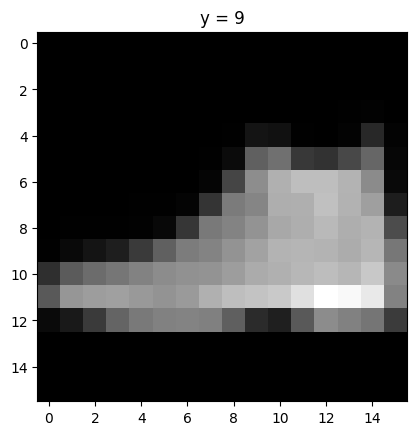

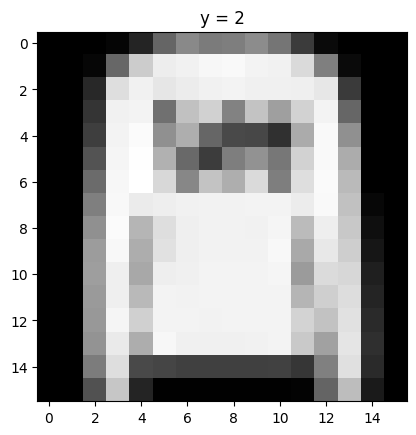

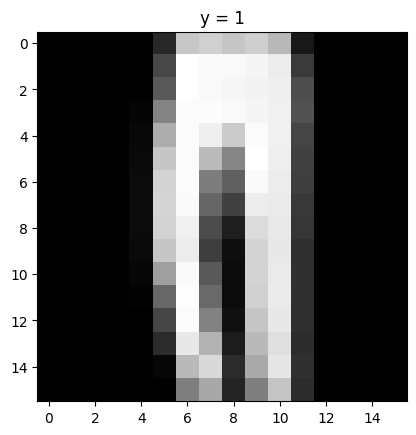

In [7]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break

In [8]:
class CNN_batch(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [9]:
class CNN(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)


    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [11]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
# model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)


import torch.nn as nn

for name, param in model.named_parameters():
    print(f"Parameter Name: {name}")
    print(f"Parameter Shape: {param.shape}")
    print(f"Parameter Values: {param}")

def reset_parameters(model):
    for layer in model.modules():
        if isinstance(layer, (nn.Conv2d, nn.Linear)):
            layer.reset_parameters()
reset_parameters(model)


Parameter Name: cnn1.weight
Parameter Shape: torch.Size([16, 1, 5, 5])
Parameter Values: Parameter containing:
tensor([[[[-0.0015,  0.1073, -0.1646, -0.1472, -0.0770],
          [ 0.0536, -0.0040,  0.1586, -0.0177,  0.0529],
          [-0.0604, -0.0393, -0.1911, -0.1325, -0.0824],
          [ 0.0074,  0.0791,  0.1200, -0.1356, -0.0871],
          [ 0.0726,  0.1661, -0.0412,  0.1497, -0.0322]]],


        [[[ 0.0212,  0.1811, -0.1855, -0.1259, -0.0506],
          [-0.0780,  0.1728, -0.1296, -0.0921, -0.1397],
          [-0.1873, -0.1167,  0.1719,  0.0892,  0.0969],
          [ 0.0105, -0.1025,  0.0338, -0.1867, -0.1445],
          [-0.1031,  0.1262,  0.1173, -0.0887, -0.0072]]],


        [[[ 0.1279,  0.1988,  0.0794,  0.0270,  0.1341],
          [-0.1178,  0.0373, -0.1551, -0.1386, -0.1033],
          [ 0.0905,  0.0804, -0.1185,  0.0604,  0.1098],
          [-0.0252,  0.0076,  0.0463,  0.1241,  0.1920],
          [-0.1541, -0.0733,  0.0786,  0.1657,  0.1740]]],


        [[[ 0.1765,  0

In [12]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [13]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()

    # print loss
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {cost/len(train_loader):.4f}")

    correct=0
    #perform a prediction on the validation  data
    model.eval()
    total = 0
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        total += y_test.size(0)
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

    # print accuracy
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/10], Loss: 0.4956
Test Accuracy: 85.01%
Epoch [2/10], Loss: 0.3548
Test Accuracy: 86.22%
Epoch [3/10], Loss: 0.3296
Test Accuracy: 86.51%
Epoch [4/10], Loss: 0.3106
Test Accuracy: 87.49%
Epoch [5/10], Loss: 0.2959
Test Accuracy: 87.85%
Epoch [6/10], Loss: 0.2859
Test Accuracy: 87.60%
Epoch [7/10], Loss: 0.2817
Test Accuracy: 87.61%
Epoch [8/10], Loss: 0.2785
Test Accuracy: 87.60%
Epoch [9/10], Loss: 0.2731
Test Accuracy: 88.11%
Epoch [10/10], Loss: 0.2694
Test Accuracy: 87.21%


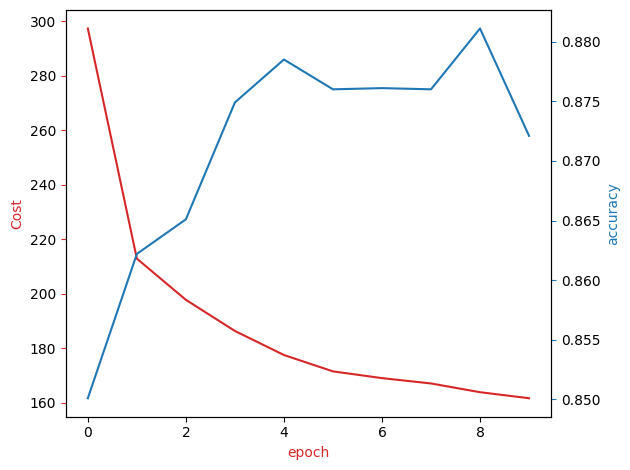

In [15]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [37]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [38]:
# model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

import torch.nn as nn

for name, param in model.named_parameters():
    print(f"Parameter Name: {name}")
    print(f"Parameter Shape: {param.shape}")
    print(f"Parameter Values: {param}")

def reset_parameters(model):
    for layer in model.modules():
        if isinstance(layer, (nn.Conv2d, nn.Linear)):
            layer.reset_parameters()
reset_parameters(model)

Parameter Name: cnn1.weight
Parameter Shape: torch.Size([16, 1, 5, 5])
Parameter Values: Parameter containing:
tensor([[[[ 1.0246e-01,  4.3529e-02,  1.7239e-01, -1.0396e-02,  8.1533e-02],
          [ 1.9889e-01,  2.3742e-02,  9.1100e-02, -1.2230e-01,  1.4964e-01],
          [ 6.2040e-02,  1.7192e-01,  4.9279e-02, -1.4204e-01,  1.0657e-01],
          [-3.3715e-02, -1.6660e-01,  3.1456e-02, -6.3296e-02, -1.4750e-01],
          [-1.9337e-01,  2.4254e-02,  8.2230e-02,  1.2936e-01,  6.2310e-02]]],


        [[[-1.7011e-01,  1.0684e-01, -3.3584e-02,  1.9962e-01,  3.7444e-02],
          [-1.6920e-01,  1.0180e-01,  1.1940e-01,  1.7545e-01, -6.6057e-02],
          [ 1.8668e-01,  1.1849e-01,  1.5381e-01, -1.3774e-01, -8.4482e-03],
          [-1.3850e-01,  5.9492e-02, -6.7288e-02,  4.5087e-02, -7.9122e-02],
          [-5.9386e-02, -4.6669e-02,  6.7458e-02, -1.1839e-01, -1.3575e-01]]],


        [[[ 1.7370e-01,  7.7947e-02, -1.5328e-01,  8.1880e-02, -4.8957e-02],
          [ 1.9034e-01, -1.4576e-0

In [39]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [40]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        # z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        # z = model(x_test.view(-1, 28 * 28))
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

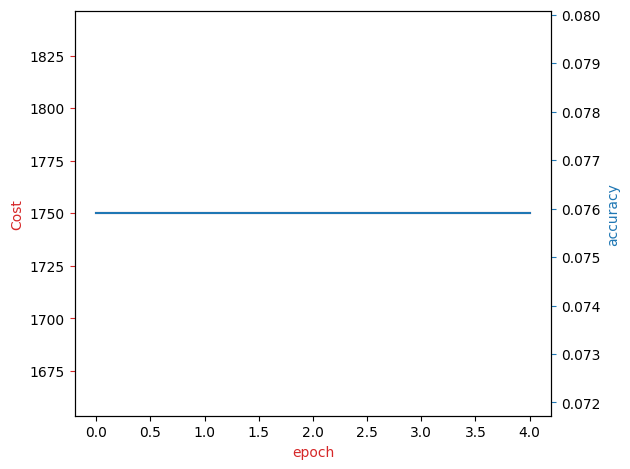

In [35]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()